In [1]:
# Show plots as part of the notebook and make tools available
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Standard library packages
import os
import sys

# Import Numpy, Pandas and Seaborn
import numpy as np
import pandas as pd
import seaborn as sns

# Import Biopython tools for running local BLASTX
import subprocess
from Bio.Blast.Applications import NcbiblastpCommandline
from Bio.Align.Applications import MuscleCommandline
from Bio import AlignIO
import sys

# Colour scale transformation
from matplotlib.colors import LogNorm

# Sequence extraction
import re
from Bio import SeqIO

# Convexhull
from scipy.spatial import ConvexHull, convex_hull_plot_2d

import random

from matplotlib.patches import Patch

pd.options.mode.chained_assignment = None  # default='warn'

import math

In [2]:
chlamycut = pd.read_csv('chlamy_proteins.txt', sep='\t', )
names = []
for i in chlamycut['Gene']:
    f = i[-18:len(i)]
    f = f[:-5]
    names.append(f)
chlamycut['Gene'] = names
chlamycut

,Gene
0,Cre02.g086150
1,Cre02.g086300
2,Cre02.g086400
3,Cre02.g086600
4,Cre02.g086887
...,...
2513,Cre02.g084200
2514,Cre02.g084600
2515,Cre02.g085257
2516,Cre02.g085550


In [3]:
xls = pd.ExcelFile('TPC2020-RA-00822R1_Supplemental_Data_Set_5.xlsx')
df = xls.parse('Supplemental DS5', skiprows=3, index_col=None, na_values=['NA'])
df

,LocusID,Group,acronym
0,Cre06.g264450,CiliaCut,AOT5
1,Cre06.g257250,CiliaCut,BBS2
2,Cre01.g043750,CiliaCut,BBS7
3,Cre16.g666500,CiliaCut,BBS8
4,Cre04.g219700,CiliaCut,BBS9
...,...,...,...
1054,Cre17.g742450,proteome,NaN
1055,Cre17.g745697,proteome,NaN
1056,Cre17.g746797,proteome,NaN
1057,Cre20.g751797,proteome,NaN


In [4]:
overlap = df[df['LocusID'].isin(chlamycut['Gene'])]
overlap

,LocusID,Group,acronym
37,Cre17.g722400,CiliaCut,MOT25
43,Cre04.g230242,CiliaCut,MOT40
48,Cre04.g224350,CiliaCut,MOT55
50,Cre17.g742000,CiliaCut,MOT8
56,Cre09.g406550,CiliaCut,RPP40
...,...,...,...
1036,Cre16.g680790,proteome,NaN
1039,Cre16.g693300,proteome,NaN
1043,Cre17.g706150,proteome,NaN
1049,Cre17.g724750,proteome,NaN


In [28]:
pivot = overlap.groupby('Group').count()
pivot = pivot.reset_index()
pivot['Group'] = ['CiliaCut', 'overlap', 'CiliaCut_excluded_FAP']
pivot

,Group,LocusID,acronym
0,CiliaCut,8,5
1,overlap,3,2
2,CiliaCut_excluded_FAP,172,135


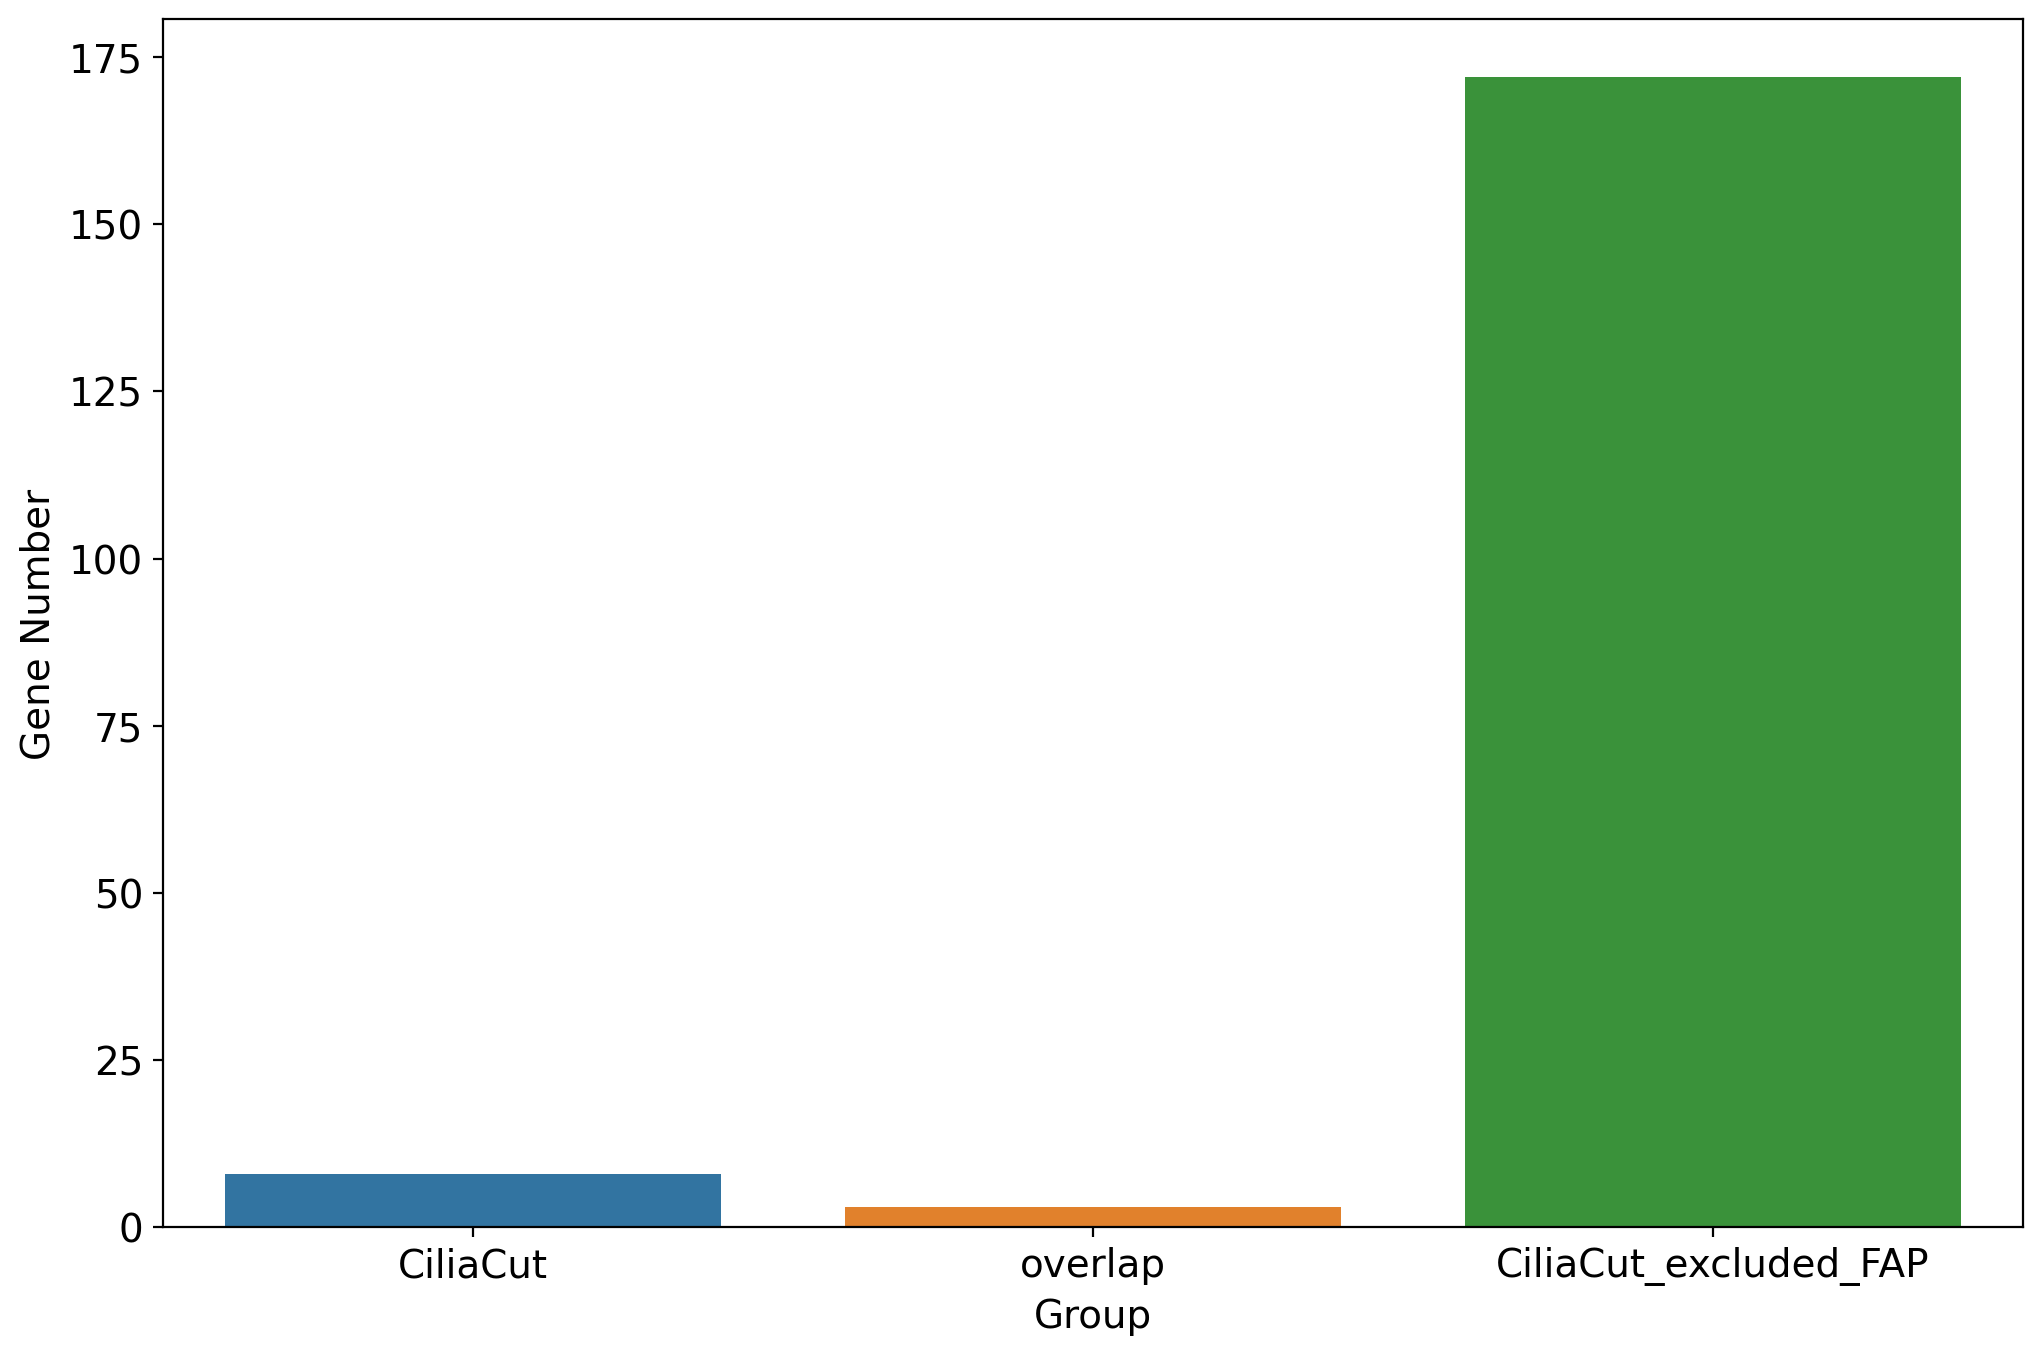

In [33]:
fig, ax = plt.subplots(figsize=(12,8), dpi= 200, facecolor='w', edgecolor='k')
ax = sns.barplot(x='Group', y='LocusID', data=pivot)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Group', fontsize=14)
plt.ylabel('Gene Number', fontsize=14)
plt.savefig('FAP_hit.png', bbox_inches='tight')

In [5]:
GOEA = pd.read_csv('GOEA.txt', sep="\t")
GOEA['modified'] = [i[:-5] for i in GOEA['study_items'].tolist()]
GOEA = GOEA.astype({'p_fdr_bh':'float'})
GOEA = GOEA[GOEA['p_fdr_bh'] < 0.05]
GOEA

,study_items,GO,NS,depth,enrichment,name,p_fdr_bh,p_uncorrected,ratio_in_pop,ratio_in_study,study_count,modified
0,Cre04.g218800.t1.1,GO:0015671,BP,5,e,oxygen transport,0.019795,0.002990,11/16403,6/2518,6,Cre04.g218800
1,Cre07.g351100.t1.2,GO:0015671,BP,5,e,oxygen transport,0.019795,0.002990,11/16403,6/2518,6,Cre07.g351100
2,Cre16.g661000.t1.2,GO:0015671,BP,5,e,oxygen transport,0.019795,0.002990,11/16403,6/2518,6,Cre16.g661000
3,Cre16.g661300.t2.1,GO:0015671,BP,5,e,oxygen transport,0.019795,0.002990,11/16403,6/2518,6,Cre16.g661300
4,Cre16.g662750.t1.2,GO:0015671,BP,5,e,oxygen transport,0.019795,0.002990,11/16403,6/2518,6,Cre16.g662750
...,...,...,...,...,...,...,...,...,...,...,...,...
5481,Cre17.g725750.t1.2,GO:0003723,MF,4,p,RNA binding,0.031912,0.002407,193/16403,15/2518,15,Cre17.g725750
5482,Cre17.g726850.t1.2,GO:0003723,MF,4,p,RNA binding,0.031912,0.002407,193/16403,15/2518,15,Cre17.g726850
5483,Cre06.g277550.t1.2,GO:0016810,MF,3,p,"hydrolase activity, acting on carbon-nitrogen ...",0.037359,0.002858,64/16403,2/2518,2,Cre06.g277550
5484,Cre13.g568250.t1.1,GO:0016810,MF,3,p,"hydrolase activity, acting on carbon-nitrogen ...",0.037359,0.002858,64/16403,2/2518,2,Cre13.g568250


In [6]:
overlap_enriched = GOEA.set_index('modified').join(overlap.set_index('LocusID'), how='inner')

In [7]:
ciliacut_overlap = overlap[overlap['Group'] != 'proteome']
ciliacut_overlap

,LocusID,Group,acronym
37,Cre17.g722400,CiliaCut,MOT25
43,Cre04.g230242,CiliaCut,MOT40
48,Cre04.g224350,CiliaCut,MOT55
50,Cre17.g742000,CiliaCut,MOT8
56,Cre09.g406550,CiliaCut,RPP40
78,Cre03.g201301,CiliaCut,NaN
83,Cre06.g309826,CiliaCut,NaN
90,Cre16.g680588,CiliaCut,NaN
122,Cre10.g438500,overlap,FAP264
123,Cre11.g482300,overlap,FAP305


In [8]:
ciliacut_overlap_enriched = overlap_enriched[overlap_enriched['Group'] != 'proteome']
ciliacut_overlap_enriched[['GO', 'name','Group','acronym']]

,GO,name,Group,acronym
Cre09.g406550,GO:0140101,"catalytic activity, acting on a tRNA",CiliaCut,RPP40
Cre09.g406550,GO:0004519,endonuclease activity,CiliaCut,RPP40


In [9]:
### In chlamy but not in sphearo? --> CiliaCut
### Different cilium in Chlamy. Has significant cluster of proteins that maintains cilia fucntiong.
### Look for cell-wall associated proteins in R script. peptidoglycan? Chlamy proteinascious vs cellular, sugar rich cell wall (Cz).

In [10]:
### algal specific proteins
### IFT didn't appear in Cz, could have a flagella? Likely that chromochloris doesn't have a flagella 
proteom_overlap = overlap[overlap['Group'] != 'CiliaCut']
proteom_overlap

,LocusID,Group,acronym
122,Cre10.g438500,overlap,FAP264
123,Cre11.g482300,overlap,FAP305
172,Cre06.g278167,overlap,NaN
179,Cre17.g738050,proteome,AGG4
194,Cre12.g485050,proteome,CAH6
...,...,...,...
1036,Cre16.g680790,proteome,NaN
1039,Cre16.g693300,proteome,NaN
1043,Cre17.g706150,proteome,NaN
1049,Cre17.g724750,proteome,NaN


In [11]:
proteome_overlap_enriched = overlap_enriched[overlap_enriched['Group'] != 'CiliaCut']
proteome_overlap_enriched[['GO', 'name','Group','acronym']]

,GO,name,Group,acronym
Cre01.g022100,GO:0071704,organic substance metabolic process,proteome,NaN
Cre01.g022100,GO:0044238,primary metabolic process,proteome,NaN
Cre01.g022100,GO:0006807,nitrogen compound metabolic process,proteome,NaN
Cre01.g022100,GO:0044237,cellular metabolic process,proteome,NaN
Cre01.g022100,GO:1901564,organonitrogen compound metabolic process,proteome,NaN
Cre01.g022100,GO:0043170,macromolecule metabolic process,proteome,NaN
Cre01.g022100,GO:0019538,protein metabolic process,proteome,NaN
Cre01.g022100,GO:0044260,cellular macromolecule metabolic process,proteome,NaN
Cre01.g022100,GO:0044267,cellular protein metabolic process,proteome,NaN
Cre01.g022100,GO:0043412,macromolecule modification,proteome,NaN


In [12]:
### Read first section, how they built co-expression network. 
### Further phylogenomic overlaps to see if they play a role in chlamy-specific flagellar fuction
### Energy consuming. tRNA? Stress-related proteins